In [3]:
!unzip dataset.zip

^C


In [22]:
#importation de bibliotheque 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (c:\Users\msi\anaconda3\lib\site-packages\keras\preprocessing\image.py)

#  Building our Model To train the data 

In [7]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 16s 1us/step


In [8]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [10]:
#data augmentation 
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'neutral': 0,
 'no stress': 1,
 'stress2': 2,
 'stress3': 3,
 'stress4': 4,
 'stress5': 5,
 'stress6': 6}

In [12]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

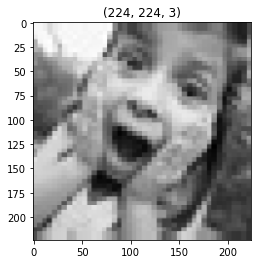

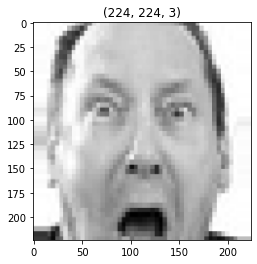

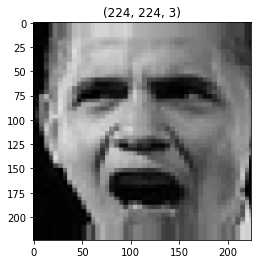

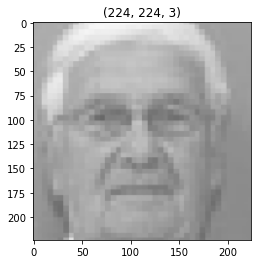

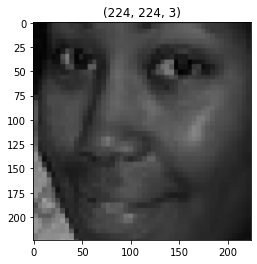

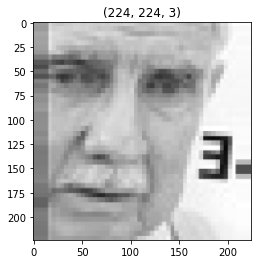

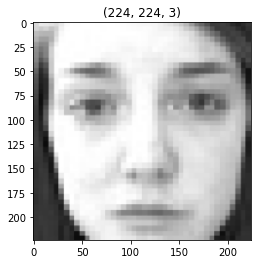

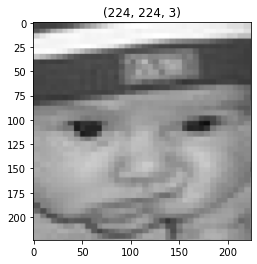

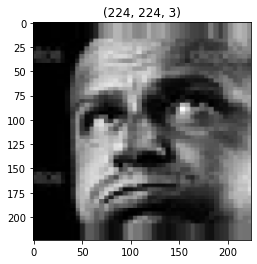

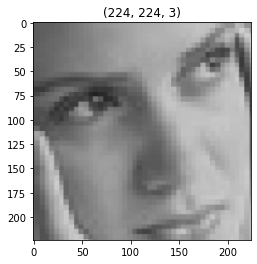

In [13]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [14]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [15]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\msi\AppData\Local\Temp\ipykernel_16296\564963302.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 15.9527 - accuracy: 0.2281
Epoch 1: val_accuracy improved from -inf to 0.19141, saving model to best_model.h5
10/10 [==============================] - 14s 1s/step - loss: 15.9527 - accuracy: 0.2281 - val_loss: 12.0421 - val_accuracy: 0.1914
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 12.8099 - accuracy: 0.2656
Epoch 2: val_accuracy improved from 0.19141 to 0.28906, saving model to best_model.h5
10/10 [==============================] - 12s 1s/step - loss: 12.8099 - accuracy: 0.2656 - val_loss: 14.5566 - val_accuracy: 0.2891
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.2259 - accuracy: 0.2969
Epoch 3: val_accuracy improved from 0.28906 to 0.33594, saving model to best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 8.2259 - accuracy: 0.2969 - val_loss: 7.2287 - val_accuracy: 0.3359
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.

In [16]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [17]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

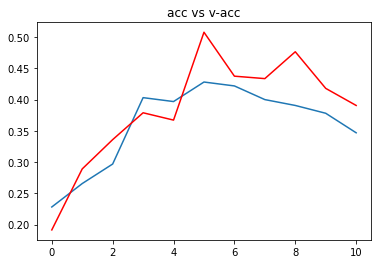

In [18]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

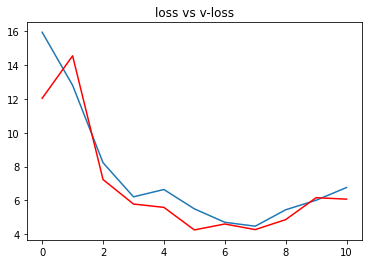

In [19]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [20]:

op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 2s 2s/step
 the image is of stress6


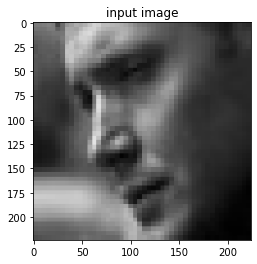

In [23]:
# path for the image to see if it predics correct class
from keras.utils import img_to_array,load_img
path = "test/stress2/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 57ms/step
 the image is of no stress


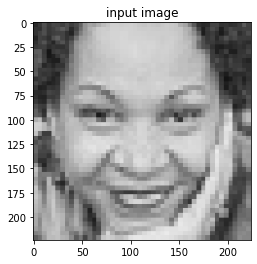

In [25]:
# path for the image to see if it predics correct class
from keras.utils import img_to_array,load_img
path = "test/no stress/PrivateTest_1533232.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 62ms/step
 the image is of stress6


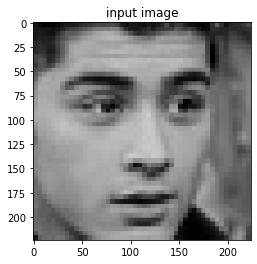

In [32]:
# path for the image to see if it predics correct class
from keras.utils import img_to_array,load_img
path = "test/neutral/PrivateTest_2134320.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()
